In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

**Loading data(audi.csv)**

In [2]:
df = pd.read_csv("../audi.csv")

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [3]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


In [4]:
df_A6 = df[df['model'] == ' A6']
display(df_A6.head())
print(df_A6.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
11,A6,2016,16500,Automatic,52198,Diesel,57.6,2.0
14,A6,2015,15400,Manual,47348,Diesel,61.4,2.0
23,A6,2015,17500,Automatic,62748,Diesel,53.3,3.0


(748, 8)


**Performing EDA based on Model**

In [5]:
df_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])
display(df_model)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


In [6]:
df_model = df_model.sort_values(by='count', ascending=False)

df_model['Percent of car'] = (df_model['count']/df_model['count'].sum())*100

df_model['sum'] = df_model['sum']/1000000

df_model = df_model.round(2)

df_model = df_model.drop('count', axis=1)

display(df_model.head())

,mean,sum,Percent of car
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


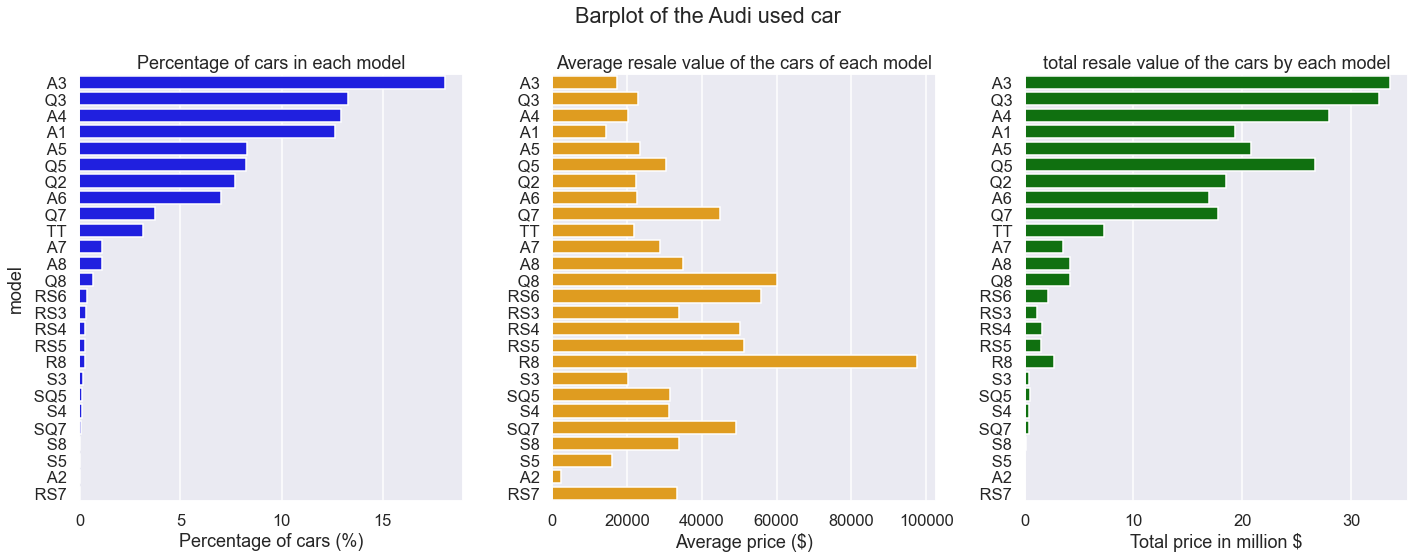

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='Percent of car', y=df_model.index, data=df_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_model.index, data=df_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_model.index, data=df_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

**Performing EDA based on Transmission**

In [9]:
df_trans = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])
display(df_trans)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [10]:
df_trans = df_trans.sort_values(by='count', ascending=False)

df_trans['Percent of car'] = (df_trans['count']/df_trans['count'].sum())*100

df_trans['sum'] = df_trans['sum']/1000000

df_trans = df_trans.round(2)

df_trans = df_trans.drop('count', axis=1)

display(df_trans.head())

,mean,sum,Percent of car
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


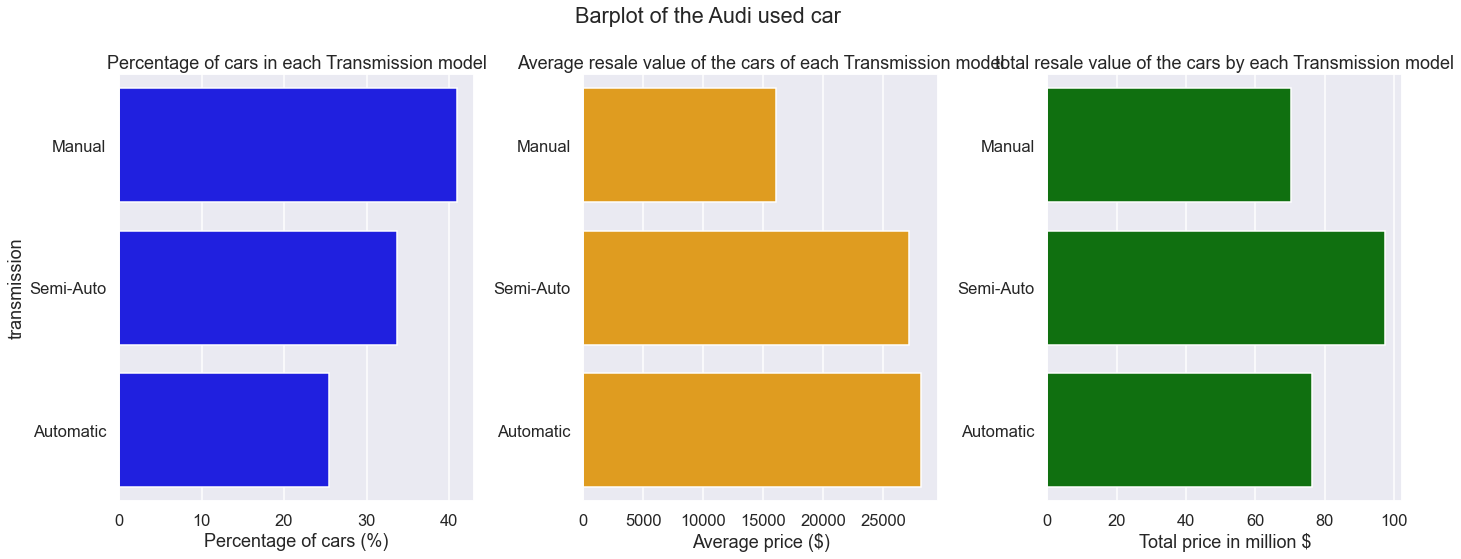

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='Percent of car', y=df_trans.index, data=df_trans, orient='h', color='blue')
plt.title("Percentage of cars in each Transmission model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_trans.index, data=df_trans, orient='h', color='orange')
plt.title("Average resale value of the cars of each Transmission model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_trans.index, data=df_trans, orient='h', color='green')
plt.title("total resale value of the cars by each Transmission model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

**Performing EDA based on Fuel Type**

In [13]:
df_fuel = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])
display(df_fuel)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


In [14]:
df_fuel = df_fuel.sort_values(by='count', ascending=False)

df_fuel['Percent of car'] = (df_fuel['count']/df_fuel['count'].sum())*100

df_fuel['sum'] = df_fuel['sum']/1000000

df_fuel = df_fuel.round(2)

df_fuel = df_fuel.drop('count', axis=1)

display(df_fuel.head())

,mean,sum,Percent of car
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


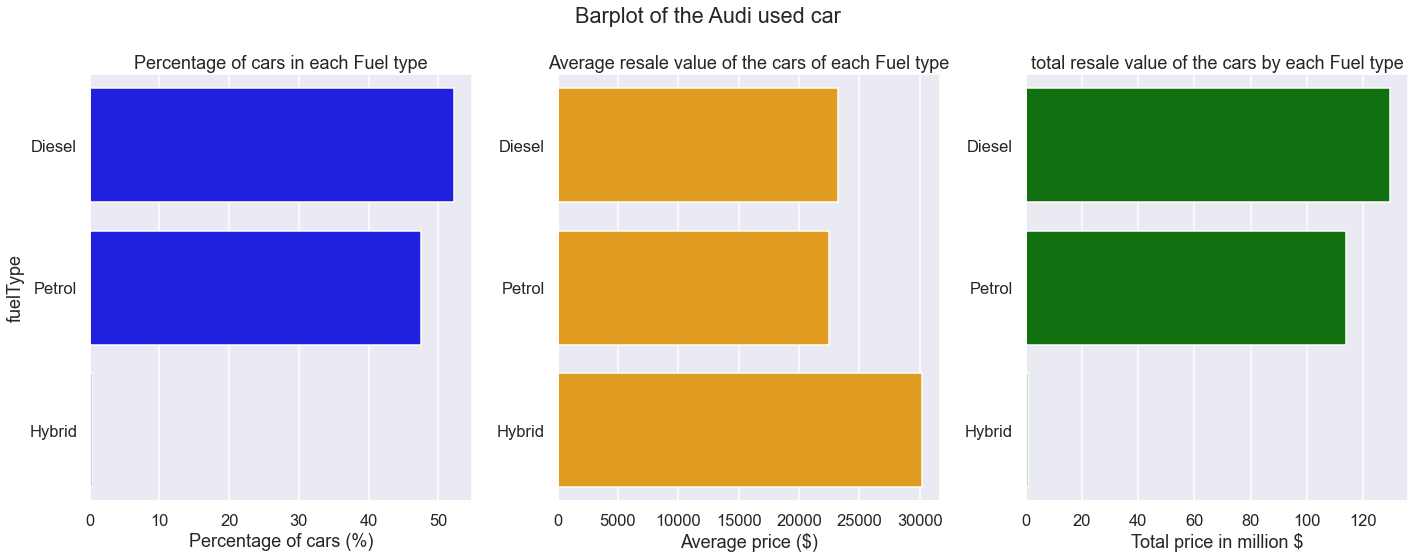

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='Percent of car', y=df_fuel.index, data=df_fuel, orient='h', color='blue')
plt.title("Percentage of cars in each Fuel type")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_fuel.index, data=df_fuel, orient='h', color='orange')
plt.title("Average resale value of the cars of each Fuel type")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_fuel.index, data=df_fuel, orient='h', color='green')
plt.title("total resale value of the cars by each Fuel type")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()